In [18]:
import pandas as pd
import numpy as np
data = p.read_csv('diabetes.csv', header='infer')
data[:3]

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive


In [19]:
sample = data.sample(n=3)
sample

,preg,plas,pres,skin,insu,mass,pedi,age,class
434,1,90,68,8,0,24.5,1.138,36,tested_negative
22,7,196,90,0,0,39.8,0.451,41,tested_positive
719,5,97,76,27,0,35.6,0.378,52,tested_positive


In [20]:
sample = data.sample(frac=0.005)
sample

,preg,plas,pres,skin,insu,mass,pedi,age,class
341,1,95,74,21,73,25.9,0.673,36,tested_negative
282,7,133,88,15,155,32.4,0.262,37,tested_negative
712,10,129,62,36,0,41.2,0.441,38,tested_positive
259,11,155,76,28,150,33.3,1.353,51,tested_positive


# Discretization

In [21]:
data.mass.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: mass, dtype: float64

In [23]:
bins = pd.cut(data.mass,5)
bins.head()

0    (26.84, 40.26]
1    (13.42, 26.84]
2    (13.42, 26.84]
3    (26.84, 40.26]
4    (40.26, 53.68]
Name: mass, dtype: category
Categories (5, interval[float64]): [(-0.0671, 13.42] < (13.42, 26.84] < (26.84, 40.26] < (40.26, 53.68] < (53.68, 67.1]]

In [24]:
bins = pd.qcut(data.mass,[0,0.25,0.5,0.75,1])
bins.head()

0      (32.0, 36.6]
1    (-0.001, 27.3]
2    (-0.001, 27.3]
3      (27.3, 32.0]
4      (36.6, 67.1]
Name: mass, dtype: category
Categories (4, interval[float64]): [(-0.001, 27.3] < (27.3, 32.0] < (32.0, 36.6] < (36.6, 67.1]]

# Principal Component Analysis (Example 1)

In [25]:
data.shape

(768, 9)

In [26]:
cov = data.cov()
cov

,preg,plas,pres,skin,insu,mass,pedi,age
preg,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620
plas,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805
pres,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453
skin,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023
insu,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290
mass,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330
pedi,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772
age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046


In [32]:
from numpy import linalg,mean,dot

cov = data.cov().to_numpy()
A = data.to_numpy()
A = A[:,:8]
[eigvals, pcs] = linalg.eig(cov)

sorted_index = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_index]
pcs = pcs[:,sorted_index]

M = (A-mean(A.T,axis=1)).T
components = dot(pcs.T,M)
components[:3,:3]

array([[-75.71465491386247, -82.35826759857929, -74.63064343955239],
       [35.95078263847813, -28.908213221886044, 67.9064964653377],
       [-7.260788952981106, -5.49667138695117, 19.461808123901235]],
      dtype=object)

# Principal Component Analysis (Example 2)

In [34]:
import pandas as p
data = p.read_csv('buy.csv', header='infer')
data

,age,membershipYears,numberOfFriends,AmountSpent,NumPurchases
0,21,2,5,100,2
1,38,0,10,10,1
2,18,0,5,25,1
3,19,5,30,1000,25
4,24,0,2,50,3
5,29,2,20,200,7
6,30,4,5,1500,15
7,31,2,70,150,5
8,40,0,11,70,4
9,44,0,8,10,1


In [35]:
data.corr()

,age,membershipYears,numberOfFriends,AmountSpent,NumPurchases
age,1.000000,-0.334731,-0.253233,-0.303731,-0.393919
membershipYears,-0.334731,1.000000,0.343459,0.851307,0.900591
numberOfFriends,-0.253233,0.343459,1.000000,0.085086,0.288885
AmountSpent,-0.303731,0.851307,0.085086,1.000000,0.853188
NumPurchases,-0.393919,0.900591,0.288885,0.853188,1.000000


In [36]:
from numpy import linalg,mean,dot
from pandas import DataFrame

numComponents = 2

cov = data.cov().to_numpy()
A = data.to_numpy()
[eigvals, pcs] = linalg.eig(cov)

sorted_index = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_index]
pcs = pcs[:,sorted_index]

print(eigvals)
M = (A-mean(A.T,axis=1)).T
projected = dot(pcs.T,M).T
projected = DataFrame(projected[:,:numComponents],columns=['pc1','pc2'])
projected

[2.24726689e+05 4.03143819e+02 1.69614335e+02 1.15026106e+01
 3.90840418e-01]


,pc1,pc2
0,168.680257,3.738699
1,258.826567,3.412064
2,243.661156,2.452026
3,-731.610997,-16.175841
4,218.704586,7.067655
5,68.649959,-7.919821
6,-1231.217724,15.348058
7,118.511454,-55.146559
8,198.810667,3.219743
9,258.889152,7.066049


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.to_numpy())
data_rescaled.shape

(12, 5)

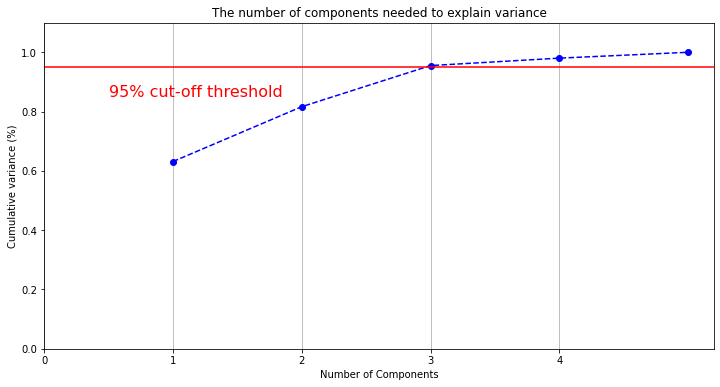

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data.to_numpy())
data_rescaled.shape


pca = PCA().fit(data_rescaled)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 5, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

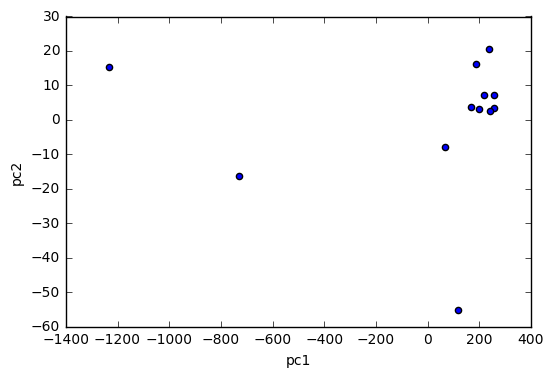

In [30]:
%matplotlib inline

projected.plot(kind='scatter',x='pc1',y='pc2')

In [31]:
pc[:,:numComponents]

array([[ 0.00925599,  0.29153545],
       [-0.00301099, -0.02282163],
       [-0.00352437, -0.95238638],
       [-0.99986089,  0.0072493 ],
       [-0.01307821, -0.08598769]])

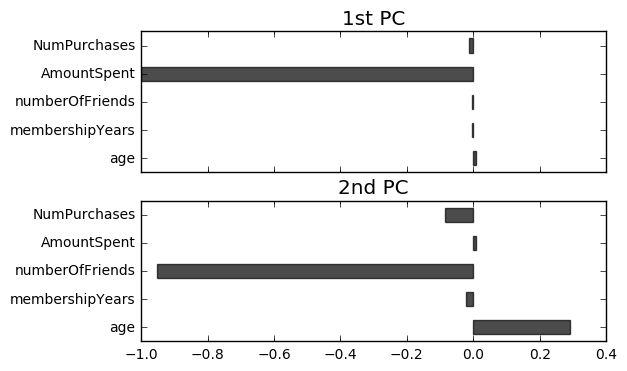

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import Series

fig,axes = plt.subplots(2,1,sharex=True)
attrib = list(data)         # get attribute names
pcdata  = Series(pc[:,0], index=attrib)
pcdata.plot(kind='barh',ax=axes[0],color='k',alpha=0.7)
axes[0].set_title(r'1st PC', size = 'x-large')
pcdata  = Series(pc[:,1], index=attrib)
pcdata.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)
axes[1].set_title(r'2nd PC', size = 'x-large')

In [14]:
eigv

array([  2.24726689e+05,   4.03143819e+02,   1.69614335e+02,
         1.15026106e+01,   3.90840418e-01])